# Pandas best practices 

## Introducing the dataset 
## Dataset 1: Stanford Open Policing Project

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
police_df = pd.read_csv('police.csv')

In [3]:
pd.set_option('display.max_row',30)

In [4]:
police_df.dtypes  

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

###### Note : object types are either string or list

In [5]:
police_df.head() 

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [6]:
# Check only the numeric columns
police_df.select_dtypes(include=['float64']) 

,county_name,driver_age_raw,driver_age
0,NaN,1985.0,20.0
1,NaN,1965.0,40.0
2,NaN,1972.0,33.0
3,NaN,1986.0,19.0
4,NaN,1984.0,21.0
...,...,...,...
91736,NaN,1986.0,29.0
91737,NaN,1982.0,33.0
91738,NaN,1992.0,23.0
91739,NaN,1993.0,22.0


In [7]:
# Check the Null Values
police_df.isna().sum()  ## Count of missing values in each column

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

#### Note : county_name column has all values as NaN where as **stop_date,stop_time,search_conducted,drug_related_stop**  are all Not NaN

In [8]:
pd.set_option('display.max_rows',None)

In [8]:
police_df.shape 

(91741, 15)

## 1. Remove the column that only contains missing values

- Method 1 : Use drop method to drop the column county_name as all the values in the column is NaN       

In [9]:
police_df.shape 

(91741, 15)

In [10]:
police_df.drop('county_name', axis = 'columns', inplace = True)

In [11]:
police_df.shape 

(91741, 14)

- Method 2 : Use dropna method to drop the column having all the values as NaN

In [12]:
police_df = pd.read_csv('police.csv')

In [13]:
police_df.shape 

(91741, 15)

In [14]:
police_df.dropna(axis = 1, how = 'all', inplace = True)

In [15]:
police_df.shape 

(91741, 14)

- Method 3 : Use ``del`` command to drop the column

In [17]:
police_df = pd.read_csv('police.csv')

In [18]:
police_df.shape 

(91741, 15)

In [19]:
del police_df['county_name']

In [20]:
police_df.shape 

(91741, 14)

# 2. Do men or women speed more often

### Columns of interest : driver_gender , violation 

In [46]:
police_df[(police_df['violation'] == 'Speeding')]['driver_gender'].value_counts() 

M    32979
F    15482
Name: driver_gender, dtype: int64

In [30]:
speeding_df = police_df[(police_df['violation'] == 'Speeding')]['driver_gender'].value_counts(normalize = True)

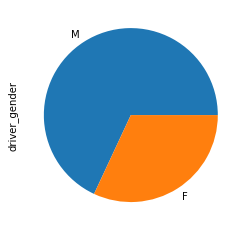

In [39]:
speeding_df.plot(kind = 'pie')

In [40]:
speeding_df

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [63]:
police_df[police_df['driver_gender'] == 'M']['violation'].value_counts(normalize = True) 

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [64]:
police_df[police_df['driver_gender'] == 'F']['violation'].value_counts(normalize = True) 

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [65]:
# To achieve the above result using a liner code
police_df.groupby('driver_gender').violation.value_counts()

driver_gender  violation          
F              Speeding               15482
               Moving violation        3204
               Equipment               2487
               Registration/plates     1013
               Other                    690
               Seat belt                635
M              Speeding               32979
               Moving violation       13020
               Equipment               8533
               Other                   3627
               Registration/plates     2419
               Seat belt               2317
Name: violation, dtype: int64

In [71]:
# Stack them 
police_df.groupby('driver_gender').violation.value_counts().unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,2487,3204,690,1013,635,15482
M,8533,13020,3627,2419,2317,32979


# Put some pie chart using Matplotlib

# 3. Does gender affect who gets searched dusing a stop ?

### Columns of interest : driver_gender , search_conducted 

In [84]:
police_df['search_conducted'].value_counts(normalize = True) 

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [86]:
police_df['search_conducted'].mean() 

0.03483720473942948

In [85]:
police_df['search_conducted'].value_counts() 

False    88545
True      3196
Name: search_conducted, dtype: int64

In [87]:
police_df.loc[:,['driver_gender','search_conducted']].groupby('driver_gender').search_conducted.value_counts(normalize = True).unstack()

search_conducted,False,True
driver_gender,,
F,0.979967,0.020033
M,0.956674,0.043326


In [91]:
police_df.groupby(['driver_gender','violation'])['search_conducted'].mean().unstack() 

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.042622,0.036205,0.056522,0.066140,0.012598,0.008720
M,0.070081,0.059831,0.047146,0.110376,0.037980,0.024925


Concusion : Mens gets search at a higher rate than women for all categories of violation

# Create pie chart showing the above result using Matplotlib

# 4. Why is search type missing so often ?

In [92]:
police_df['search_type'].value_counts(dropna = False) 

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Incident to Arrest,Protective Frisk                            33
Probable Cause,Protective Frisk                                33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Protective

In [94]:
police_df['search_conducted'].value_counts(dropna = False) 

False    88545
True      3196
Name: search_conducted, dtype: int64

In [95]:
police_df.isnull().sum() 

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [97]:
police_df[police_df['search_conducted'] == False].search_type.value_counts() 

Series([], Name: search_type, dtype: int64)

In [98]:
police_df[police_df['search_conducted'] == False].search_type.value_counts(dropna = False) 

NaN    88545
Name: search_type, dtype: int64

## Conclusion : Search not not conducted for 88545 occasion  